In [3]:
# Imported libraries for this notebook:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

# Loading the CSV file and storing into variable (df):
filepath = '/kaggle/input/cern-electron-collision-prediction-of-mass/df_train.csv'
df = pd.read_csv(filepath, index_col=0)


# Visualizations:
df.head()




,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,...,Q2,M,Q12,px12,py12,pz12,phi12,eta12,pt12,E12
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,...,-1,8.94841,-1,7.547768,-19.805230,634.729138,-4.513875,5.163125,27.504072,662.506419
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,...,1,15.89300,-1,48.635975,-2.925218,-58.616489,-8.212527,-0.831043,53.468448,113.388452
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,...,1,38.38770,1,16.909070,4.612053,-354.249244,6.371799,-3.487392,31.445869,404.080521
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,...,-1,3.72862,-1,30.708577,30.863785,1574.704187,0.569945,5.169291,68.097844,1643.222398
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,...,-1,2.74718,1,-0.820172,35.468821,814.945097,2.310784,5.074622,36.421307,853.367850


**Chart 1: Invariant Mass Distribution**

* This chart shows the result of 10,000 documented electron and positron collisions and the resulting mass readings (e.g. invariant mass) of the new (known) particles that were produced. Known, meaning these already exist in nature.
* When electrons (matter) and positrons (antimatter) collide, they annihilate each other and convert their mass into pure energy (E=mc^2)
* The different mass readings in the chart represent different, unique particles that were created as a result of these collisions.
* GeV = Giga-electronvolt (1 billion electronvolts) = basically a measurement of mass in terms of energy
* THe spike at ~91 GeV indicates the presence of the Z boson particle

More eloquent summary from Claude: 
"This histogram shows the invariant mass distribution from 10,000 electron-positron collisions at CERN. When an electron and positron annihilate, their energy can create various particles. By measuring the energy and momentum of the decay products, physicists calculate the invariant mass of the parent particle that was briefly created. The data shows two prominent features: a large peak around 10 GeV (likely Upsilon particles) and a clear peak at ~91 GeV, which is the signature of Z boson production—one of the fundamental force-carrying particles. Each collision that produced a Z boson contributes to that spike, demonstrating how particle physics experiments identify specific particles through their characteristic mass values."


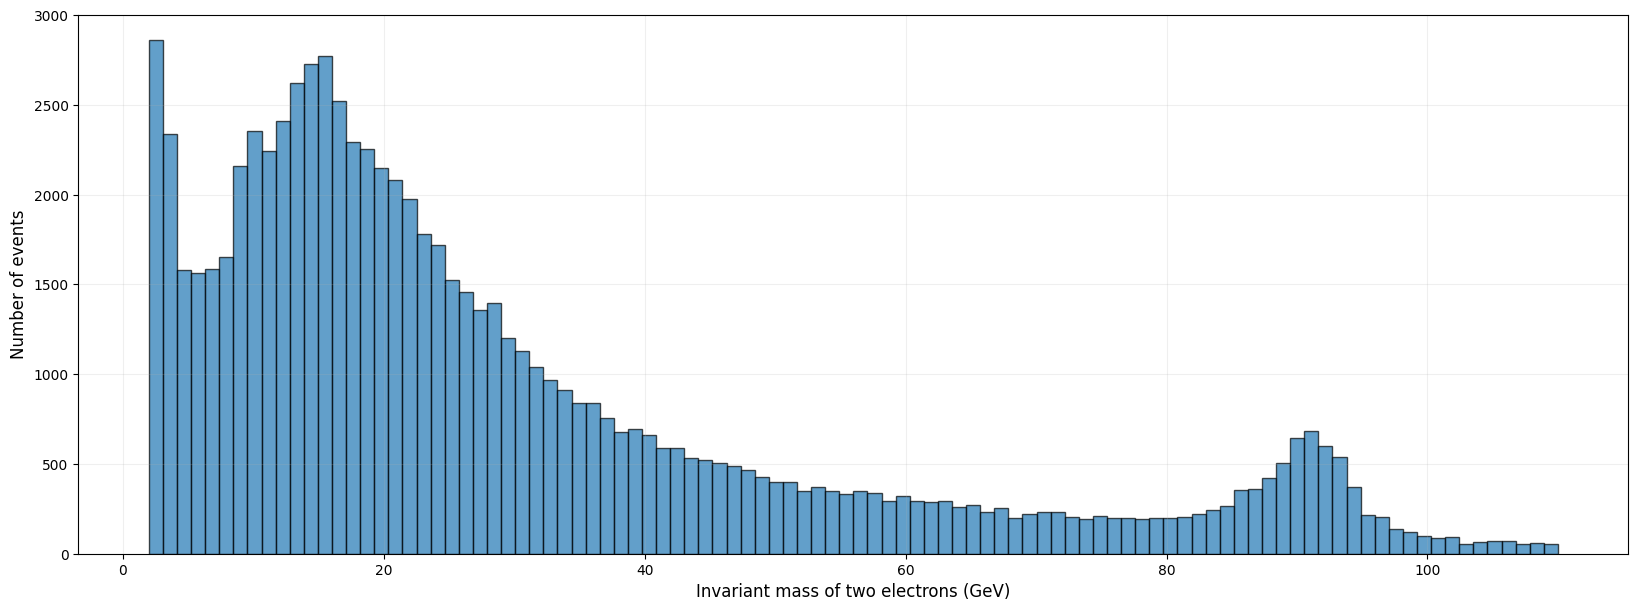

In [4]:
# Sets the size of the chart
plt.figure(figsize=(20, 7))
# Builds a histogram, which will show the distribution of one variable... here, we want to look at invariant mass ('M')
# Bins splits data into equal groupings; alpha is a transparency control
plt.hist(df['M'], bins=100, edgecolor='black', alpha=0.7)
# Label x axis values, pulled from documentation: 
plt.xlabel('Invariant mass of two electrons (GeV)', fontsize=12)
# Label y axis values (e.g. number of events / collisions):
plt.ylabel('Number of events', fontsize=12)
# Add grid lines:
plt.grid(alpha=0.2)
plt.show()


**Chart 2: Energy Distribution**

* This chart looks at the energy distribution of the two particles produced during each collision
* when electron and positron collide, they annihilate each other and produce an intermediate particle (like a Z boson)
* This particle then decays into two outgoing particles, the energy of which (GeV) are measured here as E1 and E2
* Both of the below histograms generally align, which is expected - particle 1 and particle 2 generally have similar energies



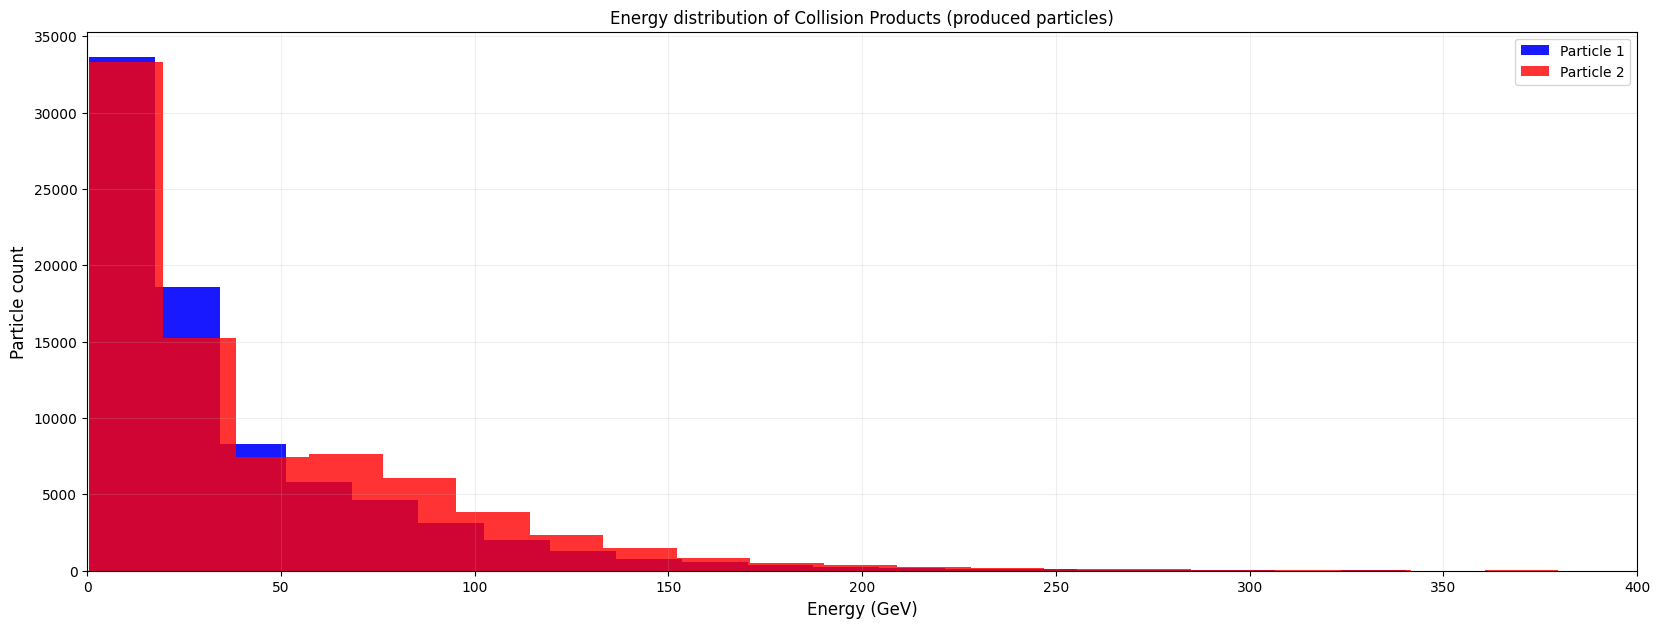

In [5]:
plt.figure(figsize=(20,7))

plt.hist(df['E1'], bins=50, label='Particle 1', color='blue', alpha=0.9)
plt.hist(df['E2'], bins=50, label='Particle 2', color='red', alpha=0.8)

plt.xlabel('Energy (GeV)', fontsize=12)
plt.ylabel('Particle count', fontsize=12)

plt.title('Energy distribution of Collision Products (produced particles)')
plt.legend()

plt.grid(alpha=0.2)

# Limit the x range of the chart to cover ~100% of the data distribution (e.g. between 0 and 400)
plt.xlim(0, 400)

plt.show()

**Chart 3: Energy vs. Mass**

* Examining the relationship between mass and energy.
* The lower linear boundary represents the "physical minimum," meaning, when a particle has (M) mass, it must have at least that same energy (E1+E2).
* The measurements of particles with sigificant variance between their M and energy values represent particles with extra kinetic energy (e.g. motion energy) on top of their mass (they're moving at high speeds)
* This is a visual representation of E=mc² (+ kinetic energy). A particle system with an invariant mass of 50 GeV must have at least a total energy of 50 GeV. In situations where the decay products are moving at high velocities or asymmetrically (e.g., one moving faster than the other), their total energy is greater due to additional kinetic energy.


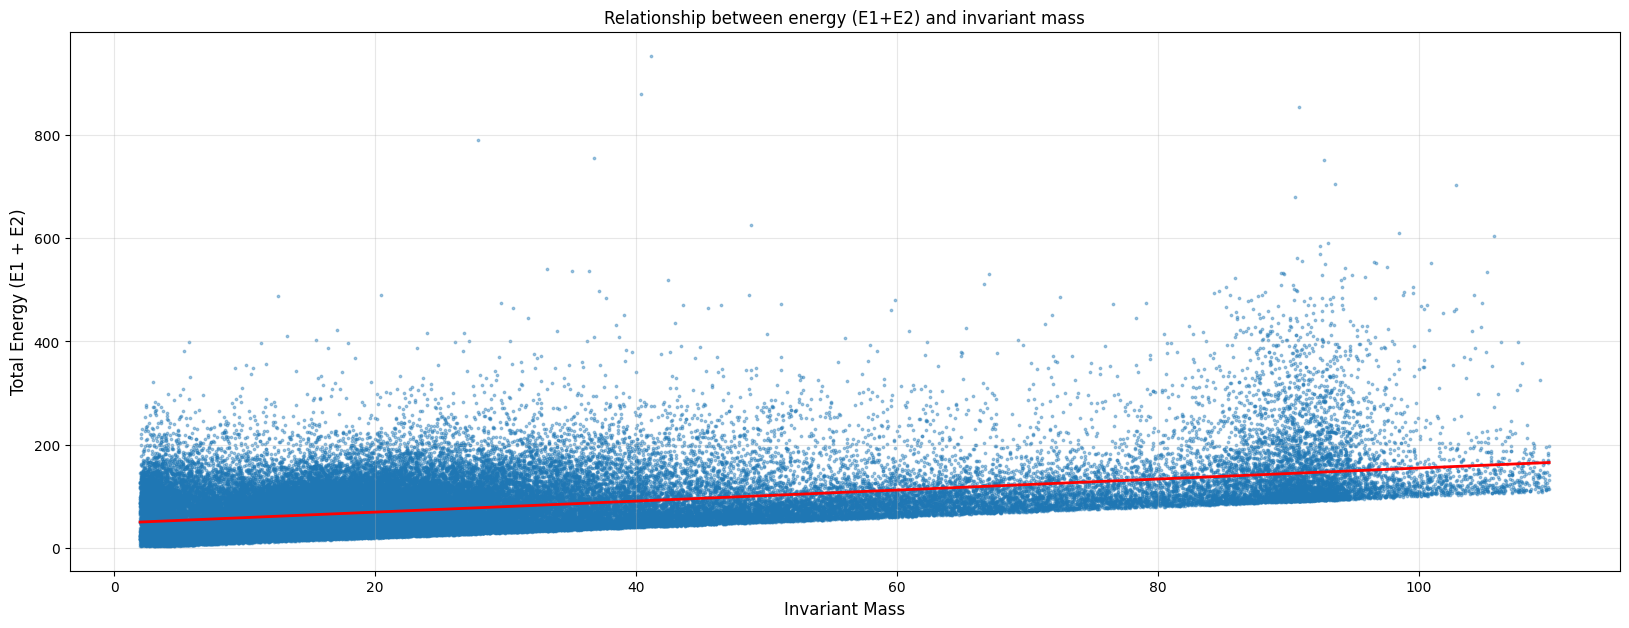

In [17]:
plt.figure(figsize=(20,7))

# sns.scatterplot(x=df['M'], y=df['E1'] + df['E2'])
sns.regplot(x=df['M'], y=df['E1'] + df['E2'], line_kws={'color': 'red', 'linewidth': 2}, scatter_kws={'alpha':0.4, 's':3},)
plt.xlabel('Invariant Mass', fontsize=12)
plt.ylabel('Total Energy (E1 + E2)', fontsize=12)
plt.title("Relationship between energy (E1+E2) and invariant mass")
plt.grid(alpha=0.3)
plt.show()